In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
import sklearn as skl
from sklearn import tree 


In [97]:
data = pd.read_table("IBM_people_dataset.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1,1102,Sales,1,2,Life Sciences,1.0,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,1,279,Research & Development,8,1,Life Sciences,1.0,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,1,1373,Research & Development,2,2,Other,1.0,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,1,1392,Research & Development,3,4,Life Sciences,1.0,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,1,591,Research & Development,2,1,Medical,1.0,7,...,4,80,1,6,3,3,2,2,2,2


In [98]:
#Droping the first 3, because there is no any variance, and no any information for decision making. The last two represent the same meaning only in different format. 
data = data.drop(["EmployeeCount"],axis=1)
data = data.drop(["Over18"],axis=1)
data = data.drop(["StandardHours"],axis=1)
data = data.drop(["MonthlyRate"],axis=1)
data = data.drop(["DailyRate"],axis=1)
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,1,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,1,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,1,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,1,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [99]:
#Categorizing these variables to make it easier to work.
data["Attrition"] = data["Attrition"].astype('category').cat.reorder_categories(['Yes', 'No',]).cat.codes
data["Gender"] = data["Gender"].astype('category').cat.reorder_categories(['Male', 'Female']).cat.codes
data["OverTime"] = data["OverTime"].astype('category').cat.reorder_categories(['Yes', 'No']).cat.codes
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,1,Sales,1,2,Life Sciences,1,2,1,...,3,1,0,8,0,1,6,4,0,5
1,49,1,1,Research & Development,8,1,Life Sciences,2,3,0,...,4,4,1,10,3,3,10,7,1,7
2,37,0,1,Research & Development,2,2,Other,4,4,0,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1,Research & Development,3,4,Life Sciences,5,4,1,...,3,3,0,8,3,3,8,7,3,0
4,27,1,1,Research & Development,2,1,Medical,7,1,0,...,3,4,1,6,3,3,2,2,2,2


In [100]:
#Dividing our age into 3 groups
def age(y):
    if y<25:
        return 0
    elif 40<y<25:
        return 1
    else:
        return 2
    

In [101]:
data["Age"] = data["Age"].apply(age)
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,0,1,Sales,1,2,Life Sciences,1,2,1,...,3,1,0,8,0,1,6,4,0,5
1,2,1,1,Research & Development,8,1,Life Sciences,2,3,0,...,4,4,1,10,3,3,10,7,1,7
2,2,0,1,Research & Development,2,2,Other,4,4,0,...,3,2,0,7,3,3,0,0,0,0
3,2,1,1,Research & Development,3,4,Life Sciences,5,4,1,...,3,3,0,8,3,3,8,7,3,0
4,2,1,1,Research & Development,2,1,Medical,7,1,0,...,3,4,1,6,3,3,2,2,2,2


In [102]:
#Checking the types of varibles, to determine which vatiables are not integers
data.dtypes

Age                          int64
Attrition                     int8
BusinessTravel               int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                        int8
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus                int64
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                      int8
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromot

In [103]:
#Getting dummy variable for non integers
department=pd.get_dummies(data["Department"])
department.head()

,Human Resources,Research & Development,Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [104]:
#Droping one of the variables not to have overlap
dropdepartment=department.drop(["Human Resources"],axis=1)
dropdepartment.head()

,Research & Development,Sales
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [105]:
#Droping the "old" column
data=data.drop(["Department"],axis=1)
data.head()
               

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,0,1,1,2,Life Sciences,1,2,1,94,...,3,1,0,8,0,1,6,4,0,5
1,2,1,1,8,1,Life Sciences,2,3,0,61,...,4,4,1,10,3,3,10,7,1,7
2,2,0,1,2,2,Other,4,4,0,92,...,3,2,0,7,3,3,0,0,0,0
3,2,1,1,3,4,Life Sciences,5,4,1,56,...,3,3,0,8,3,3,8,7,3,0
4,2,1,1,2,1,Medical,7,1,0,40,...,3,4,1,6,3,3,2,2,2,2


In [106]:
educationfield=pd.get_dummies(data["EducationField"])
educationfield.head()

,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0


In [107]:
dropeducationfield = educationfield.drop(["Human Resources"],axis=1)
dropeducationfield.head()

,Life Sciences,Marketing,Medical,Other,Technical Degree
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,0,1,0,0


In [108]:
data = data.drop(["EducationField"],axis=1)
data.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,0,1,1,2,1,2,1,94,3,...,3,1,0,8,0,1,6,4,0,5
1,2,1,1,8,1,2,3,0,61,2,...,4,4,1,10,3,3,10,7,1,7
2,2,0,1,2,2,4,4,0,92,2,...,3,2,0,7,3,3,0,0,0,0
3,2,1,1,3,4,5,4,1,56,3,...,3,3,0,8,3,3,8,7,3,0
4,2,1,1,2,1,7,1,0,40,3,...,3,4,1,6,3,3,2,2,2,2


In [109]:
jobrole = pd.get_dummies(data["JobRole"])
jobrole.head()

,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0


In [110]:
data = data.drop(["JobRole"],axis=1)
data.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,0,1,1,2,1,2,1,94,3,...,3,1,0,8,0,1,6,4,0,5
1,2,1,1,8,1,2,3,0,61,2,...,4,4,1,10,3,3,10,7,1,7
2,2,0,1,2,2,4,4,0,92,2,...,3,2,0,7,3,3,0,0,0,0
3,2,1,1,3,4,5,4,1,56,3,...,3,3,0,8,3,3,8,7,3,0
4,2,1,1,2,1,7,1,0,40,3,...,3,4,1,6,3,3,2,2,2,2


In [111]:
dropjobrole = jobrole.drop(["Human Resources"],axis=1)
dropjobrole.head()

,Healthcare Representative,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0


In [112]:
#Bringing Attrition front to have more correct correlation
front = data['Attrition']
data.drop(labels = ["Attrition"], axis = 1, inplace = True)
data.insert(0,"Attrition",front)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,2,1,1,2,1,2,1,94,3,...,3,1,0,8,0,1,6,4,0,5
1,1,2,1,8,1,2,3,0,61,2,...,4,4,1,10,3,3,10,7,1,7
2,0,2,1,2,2,4,4,0,92,2,...,3,2,0,7,3,3,0,0,0,0
3,1,2,1,3,4,5,4,1,56,3,...,3,3,0,8,3,3,8,7,3,0
4,1,2,1,2,1,7,1,0,40,3,...,3,4,1,6,3,3,2,2,2,2


In [113]:
#Checking the missing data
data.isnull().any()

Attrition                   False
Age                         False
BusinessTravel              False
DistanceFromHome            False
Education                   False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLastPromotion     False
YearsWithCurrManager        False
dtype: bool

In [114]:
data.describe()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.838776,1.868027,0.897959,9.192517,2.912925,1024.865306,2.721769,0.400000,65.891156,2.729932,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.367863,0.496686,0.302805,8.106864,1.024165,602.024335,1.093082,0.490065,20.329428,0.711561,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,2.000000,2.000000,491.250000,2.000000,0.000000,48.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.000000,2.000000,1.000000,7.000000,3.000000,1020.500000,3.000000,0.000000,66.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.000000,2.000000,1.000000,14.000000,4.000000,1555.750000,4.000000,1.000000,83.750000,3.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,2.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,1.000000,100.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [115]:
data.corr()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,0.166623,-0.074457,-0.077924,0.031373,0.010577,0.103369,0.029453,0.006846,0.130016,...,-0.002889,0.045872,0.137145,0.171063,0.059478,0.063939,0.134392,0.160545,0.033019,0.156199
Age,0.166623,1.000000,0.019029,-0.006873,0.223626,0.017939,0.000029,0.010068,0.006532,-0.023871,...,-0.008258,0.012899,0.080444,0.298082,-0.015873,-0.039425,0.212430,0.217312,0.123523,0.218131
BusinessTravel,-0.074457,0.019029,1.000000,-0.023605,-0.004524,-0.022272,-0.003568,0.050461,0.016994,0.045779,...,-0.018310,-0.021132,-0.028807,0.029742,0.020746,-0.005780,-0.007623,-0.011549,-0.020815,-0.016716
DistanceFromHome,-0.077924,-0.006873,-0.023605,1.000000,0.021042,0.032916,-0.016075,0.001851,0.031131,0.008783,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.031373,0.223626,-0.004524,0.021042,1.000000,0.042070,-0.027128,0.016547,0.016775,0.042438,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,0.010577,0.017939,-0.022272,0.032916,0.042070,1.000000,0.017621,-0.022556,0.035179,-0.006888,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.103369,0.000029,-0.003568,-0.016075,-0.027128,0.017621,1.000000,-0.000508,-0.049857,-0.008278,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,0.029453,0.010068,0.050461,0.001851,0.016547,-0.022556,-0.000508,1.000000,0.000478,-0.017960,...,0.013859,-0.022868,-0.012716,0.046881,0.038787,0.002753,0.029747,0.041483,0.026985,0.030599
HourlyRate,0.006846,0.006532,0.016994,0.031131,0.016775,0.035179,-0.049857,0.000478,1.000000,0.042861,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.130016,-0.023871,0.045779,0.008783,0.042438,-0.006888,-0.008278,-0.017960,0.042861,1.000000,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


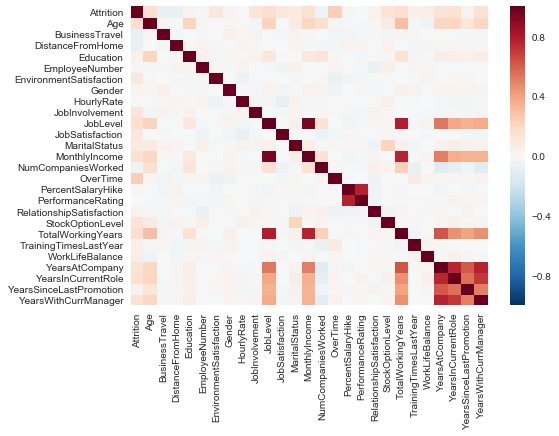

In [116]:
sns.heatmap(data.corr())
plt.show()

In [117]:
#Rejoining the droped variables:Department, Education field and jobrole
data = data.join(dropdepartment)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Research & Development,Sales
0,0,2,1,1,2,1,2,1,94,3,...,0,8,0,1,6,4,0,5,0,1
1,1,2,1,8,1,2,3,0,61,2,...,1,10,3,3,10,7,1,7,1,0
2,0,2,1,2,2,4,4,0,92,2,...,0,7,3,3,0,0,0,0,1,0
3,1,2,1,3,4,5,4,1,56,3,...,0,8,3,3,8,7,3,0,1,0
4,1,2,1,2,1,7,1,0,40,3,...,1,6,3,3,2,2,2,2,1,0


In [118]:
data = data.join(dropeducationfield)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Research & Development,Sales,Life Sciences,Marketing,Medical,Other,Technical Degree
0,0,2,1,1,2,1,2,1,94,3,...,4,0,5,0,1,1,0,0,0,0
1,1,2,1,8,1,2,3,0,61,2,...,7,1,7,1,0,1,0,0,0,0
2,0,2,1,2,2,4,4,0,92,2,...,0,0,0,1,0,0,0,0,1,0
3,1,2,1,3,4,5,4,1,56,3,...,7,3,0,1,0,1,0,0,0,0
4,1,2,1,2,1,7,1,0,40,3,...,2,2,2,1,0,0,0,1,0,0


In [119]:
data = data.join(dropjobrole)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,Other,Technical Degree,Healthcare Representative,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,0,2,1,1,2,1,2,1,94,3,...,0,0,0,0,0,0,0,0,1,0
1,1,2,1,8,1,2,3,0,61,2,...,0,0,0,0,0,0,0,1,0,0
2,0,2,1,2,2,4,4,0,92,2,...,1,0,0,1,0,0,0,0,0,0
3,1,2,1,3,4,5,4,1,56,3,...,0,0,0,0,0,0,0,1,0,0
4,1,2,1,2,1,7,1,0,40,3,...,0,0,0,1,0,0,0,0,0,0


In [120]:
data["Attrition"].value_counts()/len(data)*100

1    83.877551
0    16.122449
Name: Attrition, dtype: float64

In [121]:
from sklearn.tree import DecisionTreeClassifier

In [122]:
model = DecisionTreeClassifier(random_state=47)

In [123]:
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,Other,Technical Degree,Healthcare Representative,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,0,2,1,1,2,1,2,1,94,3,...,0,0,0,0,0,0,0,0,1,0
1,1,2,1,8,1,2,3,0,61,2,...,0,0,0,0,0,0,0,1,0,0
2,0,2,1,2,2,4,4,0,92,2,...,1,0,0,1,0,0,0,0,0,0
3,1,2,1,3,4,5,4,1,56,3,...,0,0,0,0,0,0,0,1,0,0
4,1,2,1,2,1,7,1,0,40,3,...,0,0,0,1,0,0,0,0,0,0


In [124]:
data.describe()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,Other,Technical Degree,Healthcare Representative,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.838776,1.868027,0.897959,9.192517,2.912925,1024.865306,2.721769,0.400000,65.891156,2.729932,...,0.055782,0.089796,0.089116,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463
std,0.367863,0.496686,0.302805,8.106864,1.024165,602.024335,1.093082,0.490065,20.329428,0.711561,...,0.229579,0.285986,0.285008,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,2.000000,2.000000,491.250000,2.000000,0.000000,48.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,7.000000,3.000000,1020.500000,3.000000,0.000000,66.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,1.000000,14.000000,4.000000,1555.750000,4.000000,1.000000,83.750000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,1.000000,100.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
#Setting the inputs and outputs
#Inputs are everything except Attrition
#Output is Attrition
inputs = data.iloc[:,1:]
output = data["Attrition"]

In [126]:
#Fitting the model
model.fit(inputs,output)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=47, splitter='best')

In [127]:
#Checking the accuracy
model.score(inputs,output)*100

100.0

In [128]:
#Importing the lib for exporting tree visualizaion code
from sklearn.tree import export_graphviz

In [129]:
# exporting the tree graph and then visualizing in webgraphviz.com
export_graphviz(model,"tree.dot")

In [130]:
# building new model with a max_depth specification
model_1 = DecisionTreeClassifier(max_depth=7, random_state=47)
inputs_train,inputs_test,output_train,output_test = train_test_split(inputs,output,train_size=0.75)

In [131]:
model_1.fit(inputs_train,output_train)
model_1.score(inputs_test,output_test)*100

82.065217391304344

In [132]:
export_graphviz(model_1,"tree_x.dot")

In [133]:

df = pd.DataFrame(index=list(data)[1:],data = model.feature_importances_)
df

,0
Age,0.007903
BusinessTravel,0.000000
DistanceFromHome,0.029443
Education,0.017320
EmployeeNumber,0.040207
EnvironmentSatisfaction,0.026572
Gender,0.015361
HourlyRate,0.060738
JobInvolvement,0.024798
JobLevel,0.011404


In [135]:
#sorting values by teh only column we have in a descending order
#You can see that monthly income, hourly rate and over time are the three most important variables. 
df.sort_values(by=0, ascending = False)

,0
MonthlyIncome,0.124056
HourlyRate,0.060738
OverTime,0.060574
TotalWorkingYears,0.059985
TrainingTimesLastYear,0.047496
PercentSalaryHike,0.045437
StockOptionLevel,0.044021
JobSatisfaction,0.041029
EmployeeNumber,0.040207
WorkLifeBalance,0.036087
